## 入力項目の重要度

In [9]:
# 余分な Warning を非表示にする
import warnings

warnings.filterwarnings('ignore')

# Library の Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost

# matplotlib 日本語化対応
import japanize_matplotlib

# 表示 Option の調整
np.set_printoptions(suppress=True, precision=4)  # NumPy の浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format  # pandas での浮動小数点の表示精度
pd.set_option('display.max_columns', None)  # DataFrame ですべての項目を表示
plt.rcParams['font.size'] = 14  # Graph の Default font 指定
random_seed = 123  # 乱数の種

In [2]:
# Random Forest の Model を作るまで
df_iris = sns.load_dataset('iris')
columns_i = ['がく片長', 'がく片幅', '花弁長', '花弁幅', '種別']
df_iris.columns = columns_i

# 入力 Data x
x = df_iris[['がく片長', 'がく片幅', '花弁長', '花弁幅']]

# 正解 Data y
y = df_iris['種別']

# Algorithm の選択（Random Forest）
algorithm = RandomForestClassifier(random_state=random_seed)

# 学習
algorithm.fit(x, y)

RandomForestClassifier(random_state=123)

In [5]:
# 重要度 vector の取得
importances = algorithm.feature_importances_

# 項目名を Key に Series を生成
w = pd.Series(importances, index=x.columns)

# 値を大きい順に Sort
u = w.sort_values(ascending=False)

# 結果検証
print(u)

花弁長    0.4611
花弁幅    0.4257
がく片長   0.0874
がく片幅   0.0257
dtype: float64


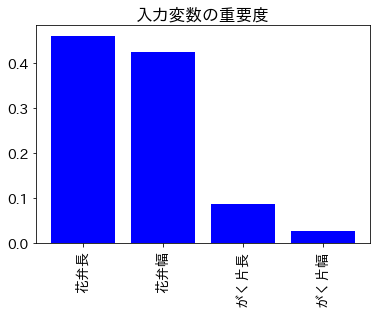

In [6]:
# 重要度の棒 Graph 表示

# 棒 Graph 表示
plt.bar(range(len(u)), u, color='b', align='center')

# 項目名表示（90度回転）
plt.xticks(range(len(u)), u.index, rotation=90)

# Title 表示
plt.title('入力変数の重要度')

plt.show()

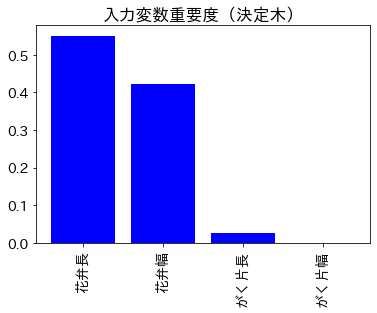

In [8]:
# 決定木の場合
algorithm = DecisionTreeClassifier(random_state=random_seed)
algorithm.fit(x, y)
importances = algorithm.feature_importances_
w = pd.Series(importances, index=x.columns)
u = w.sort_values(ascending=False)
plt.title('入力変数重要度（決定木）')
plt.bar(range(len(u)), u, color='b', align='center')
plt.xticks(range(len(u)), u.index, rotation=90)
plt.show()

[06:09:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


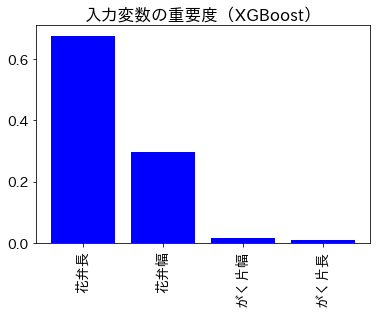

In [10]:
# XGBoost の場合
algorithm = xgboost.XGBClassifier(random_state=random_seed)
algorithm.fit(x, y)
importances = algorithm.feature_importances_
w = pd.Series(importances, index=x.columns)
u = w.sort_values(ascending=False)
plt.title('入力変数の重要度（XGBoost）')
plt.bar(range(len(u)), u, color='b', align='center')
plt.xticks(range(len(u)), u.index, rotation=90)
plt.show()